In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
dataset_file_name = 'human_dataset.txt'
human_data = pd.read_table('../Datasets/' + dataset_file_name)
print(f"Human dataset has a total of {human_data.shape[0]} patterns")

Human dataset has a total of 4380 patterns


In [3]:
class_names = [
    'G Protien Coupled Receptors',
    'Tyrosine Kinase',
    'Tyrosine Phosphatase',
    'Synthetase',
    'Synthase',
    'Ion Channel',
    'Transcription Factor'
]

In [4]:
df = human_data.groupby('class').count().reset_index()
df['class_name'] = class_names

df.rename(columns={'class': 'class_label', 'sequence': 'count'}, inplace=True)
df = df.reindex(columns=['class_label', 'class_name', 'count'])
df = df.style.set_properties(**{'text-align': 'center'})
df = df.set_table_styles([dict(selector = 'th', props=[('text-align', 'center')])])
df

,class_label,class_name,count
0,0,G Protien Coupled Receptors,531
1,1,Tyrosine Kinase,534
2,2,Tyrosine Phosphatase,349
3,3,Synthetase,672
4,4,Synthase,711
5,5,Ion Channel,240
6,6,Transcription Factor,1343


In [5]:
df = human_data
df.rename(columns={'class': 'class_label'}, inplace=True)
# use class_names to map class_label to class_name
df['class_name'] = df['class_label'].map(lambda x: class_names[x])

In [6]:
def countPlot(data=None, x=None, y=None, palette='bright', height=15, title=' ', subtitle=' ', description=' '):
    sns.set(style = 'whitegrid', rc = {'figure.figsize': (20,height)})
    g = sns.countplot(data=data, y=y, x=x, palette=palette)
    g.set_ylabel(' \n\n\n')
    g.set_xlabel(' \n\n\n\n\n')
    g.set_title(f'\n\n\n\n{title}\n\n'.upper(), loc = 'left', fontdict = dict(fontsize = 15, fontweight = 'bold'))
    g.set_yticklabels(
        [tick_label.get_text().title() for tick_label in g.get_yticklabels()],
        fontdict = dict(
            fontsize = 12.5,
            fontweight = 'medium'))
    
    plt.text(s = f'{description}',
             alpha = 0.5,
             x = 0,
             y = -.18,
             verticalalignment = 'baseline',
             horizontalalignment = 'left',
             transform = g.transAxes)
    
    g.bar_label(container = g.containers[0], padding = 10,)
    plt.text(s = ' ', x = 1.08, y = 1, transform = g.transAxes)
    sns.despine()
    return g

def piePlot(data=None, value='Percentage', name='Class', title=' ', subtitle=' ', description=' '):
    data_pie = pd.DataFrame(data.value_counts() / data.shape[0]*100).reset_index()
    data_pie.columns = [name, value]
    fig = px.pie(data_pie, values=value, names=name, title=title)
    fig.update_layout(title=title, title_x=0.48)
    fig.show()

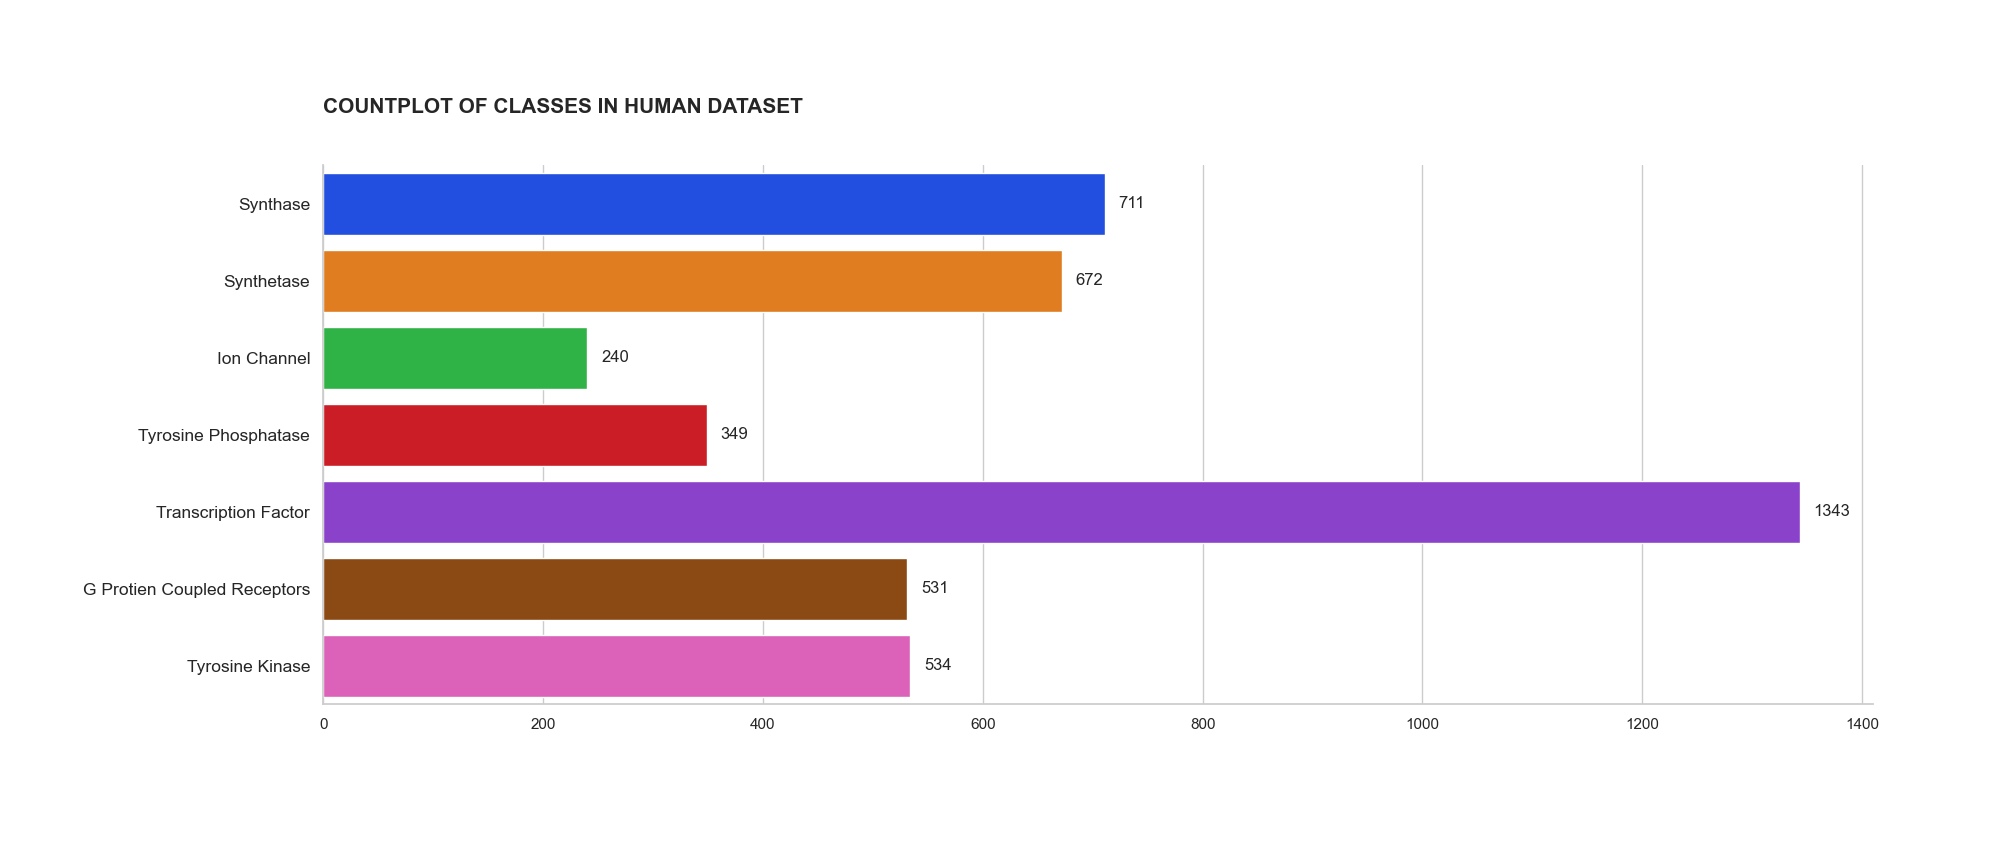

In [7]:
countPlot(y = df['class_name'], title = 'Countplot of Classes in Human Dataset', height = df['class_name'].nunique());
piePlot(data = df['class_name'], value = 'Percentage', name = 'Class', title = 'Class Distribution of Human Dataset')  